In [1]:
import numpy as np 
import pandas as pd 
import os

for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/data-science-bowl-2018/stage1_test.zip
/kaggle/input/data-science-bowl-2018/stage1_sample_submission.csv.zip
/kaggle/input/data-science-bowl-2018/stage2_sample_submission_final.csv.zip
/kaggle/input/data-science-bowl-2018/stage1_train.zip
/kaggle/input/data-science-bowl-2018/stage1_train_labels.csv.zip
/kaggle/input/data-science-bowl-2018/stage1_solution.csv.zip
/kaggle/input/data-science-bowl-2018/stage2_test_final.zip


In [2]:
import tensorflow as tf
import os
import random
import numpy as np
 
from tqdm import tqdm 

from skimage.io import imread, imshow
from skimage.transform import resize
import matplotlib.pyplot as plt
%matplotlib inline

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [3]:
import zipfile

# Path to the ZIP file
TRAIN_PATH = '/kaggle/input/data-science-bowl-2018/stage1_train.zip'
TEST_PATH = '/kaggle/input/data-science-bowl-2018/stage1_test.zip'

# Destination directory to extract the contents
extracted_path1 = '/kaggle/working/stage1_train/'
extracted_path2 = '/kaggle/working/stage1_test/'

# Unzipping the file
with zipfile.ZipFile(TRAIN_PATH, 'r') as zip_ref:
    zip_ref.extractall(extracted_path1)
with zipfile.ZipFile(TEST_PATH, 'r') as zip_ref:
    zip_ref.extractall(extracted_path2)
print(extracted_path1)
print(extracted_path2)


/kaggle/working/stage1_train/
/kaggle/working/stage1_test/


In [4]:
extracted_path1

'/kaggle/working/stage1_train/'

In [5]:
# print(extracted_path)
## Setting a random seed for reproducibility
seed = 42
np.random.seed = seed

# Setting image dimensions
IMG_WIDTH = 128
IMG_HEIGHT = 128
IMG_CHANNELS = 3

# Defining paths to the training and test datasets
TRAIN_PATH = extracted_path1
TEST_PATH = extracted_path2

# Listing the IDs of the training and test samples
train_ids = next(os.walk(TRAIN_PATH))[1]
test_ids = next(os.walk(TEST_PATH))[1]

# Displaying paths and information about the training data
print(TRAIN_PATH)
print(TEST_PATH)
print(os.walk(TRAIN_PATH))

# Initializing arrays to store training data and corresponding masks
X_train = np.zeros((len(train_ids), IMG_HEIGHT, IMG_WIDTH, IMG_CHANNELS), dtype=np.uint8)
Y_train = np.zeros((len(train_ids), IMG_HEIGHT, IMG_WIDTH, 1), dtype=np.bool_)

/kaggle/working/stage1_train/
/kaggle/working/stage1_test/
<generator object _walk at 0x7ef4090f7ae0>


In [6]:
print(train_ids)

['b67a6e5da8b1cfa5319d94a7d3f8b706725753346c37a4636bf7382e98b3c5df', 'b4d902d42c93dea77b541456f8d905f35eeb24fc3a5b0b15b5678d78e0aabe0c', 'b3a9f4c9035a0df7e033b18c63bfb0f0d87ff5a4d9aa8bdf417159bb733abb80', '6b72b61b80060a9e79a4747f9c5d5af135af9db466681c2d1086f784c7130699', '35ca5f142a7d7a3e4b59f1a767a31f87cb00d66348226bc64094ee3d1e46531c', '52a6b8ae4c8e0a8a07a31b8e3f401d8811bf1942969c198e51dfcbd98520aa60', '3d0ca3498d97edebd28dbc7035eced40baa4af199af09cbb7251792accaa69fe', '88678981648b184b23b6c04999f29210cbe351f85b61d2bf99e306fd67a2998a', '54fe2d3416951cbc48f8718624c86a7ae58b6022a7fa75591b13f625cf53658b', '136000dc18fa6def2d6c98d4d0b2084d13c22eaffe82e26c665bcaa2a9e51261', 'd7fc0d0a7339211f2433829c6553b762e2b9ef82cfe218d58ecae6643fa8e9c7', '5bda829acd824821bc1f3f6573cf065d364653d5322f033a4af943f7a6170566', '3594684b9ea0e16196f498815508f8d364d55fea2933a2e782122b6f00375d04', '08ae2741df2f5ac815c0f272a8c532b5167ee853be9b939b9b8b7fa93560868a', '1d5f4717e179a03675a5aac3fc1c862fb442ddc3e37392

In [7]:
print(len(train_ids))

670


In [8]:
print(test_ids)

['4be73d68f433869188fe5e7f09c7f681ed51003da6aa5d19ce368726d8e271ee', '3c4c675825f7509877bc10497f498c9a2e3433bf922bd870914a2eb21a54fd26', '53df5150ee56253fe5bc91a9230d377bb21f1300f443ba45a758bcb01a15c0e4', '4727d94c6a57ed484270fdd8bbc6e3d5f2f15d5476794a4e37a40f2309a091e2', '259b35151d4a7a5ffdd7ab7f171b142db8cfe40beeee67277fac6adca4d042c4', '1cdbfee1951356e7b0a215073828695fe1ead5f8b1add119b6645d2fdc8d844e', 'a4816cc1fb76cb3c5e481186833fc0ae9cf426a1406a2607e974e65e9cddba4f', 'da6c593410340b19bb212b9f6d274f95b08c0fc8f2570cd66bc5ed42c560acab', '0e132f71c8b4875c3c2dd7a22997468a3e842b46aa9bd47cf7b0e8b7d63f0925', 'ab298b962a63e4be9582513aaa84a5e270adba5fd2b16a50e59540524f63c3b8', 'ca20076870e8fb604e61802605a9ac45419c82dd3e23404c56c4869f9502a5ef', '0114f484a16c152baa2d82fdd43740880a762c93f436c8988ac461c5c9dbe7d5', 'df40099c6306ca1f47fcc8a62e2fa39486d4e223177afdc51b2ad189691802d8', 'e17b7aedd251a016c01ef9158e6e4aa940d9f1b35942d86028dc1222192a9258', 'fe9adb627a6f45747c5a8223b671774791ededf9364f65

In [9]:
print(len(test_ids))

65


In [10]:
print(X_train)

[[[[0 0 0]
   [0 0 0]
   [0 0 0]
   ...
   [0 0 0]
   [0 0 0]
   [0 0 0]]

  [[0 0 0]
   [0 0 0]
   [0 0 0]
   ...
   [0 0 0]
   [0 0 0]
   [0 0 0]]

  [[0 0 0]
   [0 0 0]
   [0 0 0]
   ...
   [0 0 0]
   [0 0 0]
   [0 0 0]]

  ...

  [[0 0 0]
   [0 0 0]
   [0 0 0]
   ...
   [0 0 0]
   [0 0 0]
   [0 0 0]]

  [[0 0 0]
   [0 0 0]
   [0 0 0]
   ...
   [0 0 0]
   [0 0 0]
   [0 0 0]]

  [[0 0 0]
   [0 0 0]
   [0 0 0]
   ...
   [0 0 0]
   [0 0 0]
   [0 0 0]]]


 [[[0 0 0]
   [0 0 0]
   [0 0 0]
   ...
   [0 0 0]
   [0 0 0]
   [0 0 0]]

  [[0 0 0]
   [0 0 0]
   [0 0 0]
   ...
   [0 0 0]
   [0 0 0]
   [0 0 0]]

  [[0 0 0]
   [0 0 0]
   [0 0 0]
   ...
   [0 0 0]
   [0 0 0]
   [0 0 0]]

  ...

  [[0 0 0]
   [0 0 0]
   [0 0 0]
   ...
   [0 0 0]
   [0 0 0]
   [0 0 0]]

  [[0 0 0]
   [0 0 0]
   [0 0 0]
   ...
   [0 0 0]
   [0 0 0]
   [0 0 0]]

  [[0 0 0]
   [0 0 0]
   [0 0 0]
   ...
   [0 0 0]
   [0 0 0]
   [0 0 0]]]


 [[[0 0 0]
   [0 0 0]
   [0 0 0]
   ...
   [0 0 0]
   [0 0 0]
   [0 0 0]]

  [[0 0

In [11]:
X_train.shape

(670, 128, 128, 3)

This Shape of the X_train shows us the Basic Structure of our X_train repositry which concludes that we have 670 images of Height 128, Width 128 and they have 3 Channels.

In [12]:
print(Y_train)

[[[[False]
   [False]
   [False]
   ...
   [False]
   [False]
   [False]]

  [[False]
   [False]
   [False]
   ...
   [False]
   [False]
   [False]]

  [[False]
   [False]
   [False]
   ...
   [False]
   [False]
   [False]]

  ...

  [[False]
   [False]
   [False]
   ...
   [False]
   [False]
   [False]]

  [[False]
   [False]
   [False]
   ...
   [False]
   [False]
   [False]]

  [[False]
   [False]
   [False]
   ...
   [False]
   [False]
   [False]]]


 [[[False]
   [False]
   [False]
   ...
   [False]
   [False]
   [False]]

  [[False]
   [False]
   [False]
   ...
   [False]
   [False]
   [False]]

  [[False]
   [False]
   [False]
   ...
   [False]
   [False]
   [False]]

  ...

  [[False]
   [False]
   [False]
   ...
   [False]
   [False]
   [False]]

  [[False]
   [False]
   [False]
   ...
   [False]
   [False]
   [False]]

  [[False]
   [False]
   [False]
   ...
   [False]
   [False]
   [False]]]


 [[[False]
   [False]
   [False]
   ...
   [False]
   [False]
   [False]]

  [[Fal

In [13]:
Y_train.shape

(670, 128, 128, 1)

In [15]:
# Display a message indicating the resizing process for training images and masks
print('Resizing training images and masks')

# Iterate over each training sample
for n, id_ in tqdm(enumerate(train_ids), total=len(train_ids)):   
    # Construct the path to the current training sample
    path = TRAIN_PATH + id_

    # Load and resize the training image
    img = imread(path + '/images/' + id_ + '.png')[:,:,:IMG_CHANNELS]  
    img = resize(img, (IMG_HEIGHT, IMG_WIDTH), mode='constant', preserve_range=True)
    
    # Fill the X_train array with the resized image
    X_train[n] = img

    # Initialize an empty mask for the current training sample
    mask = np.zeros((IMG_HEIGHT, IMG_WIDTH, 1), dtype=np.bool_)

    # Iterate over each mask file in the 'masks' directory for the current sample
    for mask_file in next(os.walk(path + '/masks/'))[2]:
        # Load and resize the current mask
        mask_ = imread(path + '/masks/' + mask_file)
        mask_ = np.expand_dims(resize(mask_, (IMG_HEIGHT, IMG_WIDTH), mode='constant',  
                                      preserve_range=True), axis=-1)
        
        # Update the mask by taking the element-wise maximum with the current mask
        mask = np.maximum(mask, mask_)  

    # Fill the Y_train array with the final mask for the current training sample
    Y_train[n] = mask


Resizing training images and masks


100%|██████████| 670/670 [04:04<00:00,  2.74it/s]


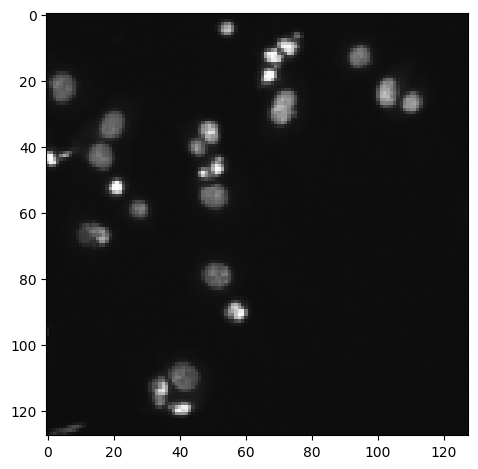

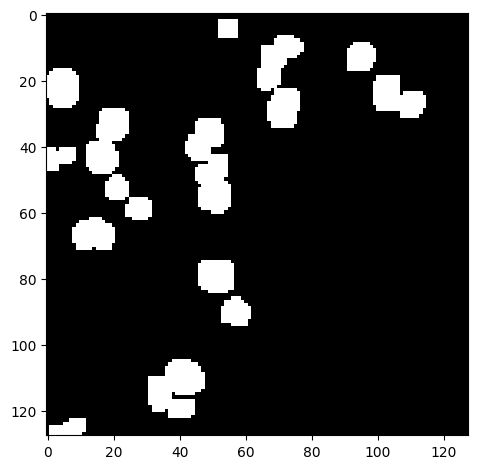

In [21]:
# Randomly select an index for visualization
image_x = random.randint(0, len(train_ids))

# Display the randomly selected original image from X_train
imshow(X_train[image_x])
plt.show()

# Display the corresponding mask image (after squeezing to remove single-dimensional entries) from Y_train
imshow(np.squeeze(Y_train[image_x]))
plt.show()


In [24]:
# Create an array to store resized test images
X_test = np.zeros((len(test_ids), IMG_HEIGHT, IMG_WIDTH, IMG_CHANNELS), dtype=np.uint8)

# Create an empty list to store sizes of test images
sizes_test = []

# Display a message indicating the resizing process for test images
print('Resizing test images')

# Iterate over each test sample
for n, id_ in tqdm(enumerate(test_ids), total=len(test_ids)):
    # Construct the path to the current test sample
    path = TEST_PATH + id_

    # Load the test image
    img = imread(path + '/images/' + id_ + '.png')[:,:,:IMG_CHANNELS]

    # Store the original size of the test image
    sizes_test.append([img.shape[0], img.shape[1]])

    # Resize the test image and fill the X_test array
    img = resize(img, (IMG_HEIGHT, IMG_WIDTH), mode='constant', preserve_range=True)
    X_test[n] = img



Resizing test images


100%|██████████| 65/65 [00:01<00:00, 46.09it/s]


In [25]:
print(X_test)

[[[[ 13  13  13]
   [  6   6   6]
   [  2   2   2]
   ...
   [ 23  23  23]
   [ 17  17  17]
   [ 14  14  14]]

  [[  7   7   7]
   [  5   5   5]
   [  3   3   3]
   ...
   [ 20  20  20]
   [ 16  16  16]
   [ 13  13  13]]

  [[  3   3   3]
   [  3   3   3]
   [  3   3   3]
   ...
   [ 16  16  16]
   [ 14  14  14]
   [ 12  12  12]]

  ...

  [[ 31  31  31]
   [ 40  40  40]
   [ 48  48  48]
   ...
   [  5   5   5]
   [  3   3   3]
   [  2   2   2]]

  [[ 34  34  34]
   [ 45  45  45]
   [ 54  54  54]
   ...
   [  5   5   5]
   [  4   4   4]
   [  3   3   3]]

  [[ 35  35  35]
   [ 44  44  44]
   [ 54  54  54]
   ...
   [  4   4   4]
   [  3   3   3]
   [  3   3   3]]]


 [[[191 197 180]
   [205 208 182]
   [205 208 178]
   ...
   [216 223 207]
   [217 221 205]
   [203 206 191]]

  [[217 221 194]
   [232 237 210]
   [232 237 210]
   ...
   [240 246 233]
   [241 247 230]
   [225 228 217]]

  [[218 225 202]
   [232 242 216]
   [232 240 217]
   ...
   [243 243 230]
   [244 246 231]
   [227 229

In [26]:
X_test.shape

(65, 128, 128, 3)

This matrices gave us some intuition that there are some colored images in test directory so lets print some of them and Check.

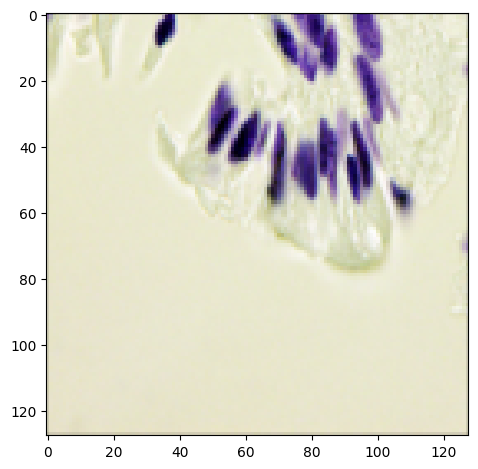

In [36]:
# Randomly select an index for visualization
image_x = random.randint(0, len(test_ids))

# Display the randomly selected original image from X_test
imshow(X_test[image_x])
plt.show()

In [37]:
#Build the model
inputs = tf.keras.layers.Input((IMG_HEIGHT, IMG_WIDTH, IMG_CHANNELS))
s = tf.keras.layers.Lambda(lambda x: x / 255)(inputs)

#Contraction path
c1 = tf.keras.layers.Conv2D(16, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(s)
c1 = tf.keras.layers.Dropout(0.1)(c1)
c1 = tf.keras.layers.Conv2D(16, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c1)
p1 = tf.keras.layers.MaxPooling2D((2, 2))(c1)

c2 = tf.keras.layers.Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(p1)
c2 = tf.keras.layers.Dropout(0.1)(c2)
c2 = tf.keras.layers.Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c2)
p2 = tf.keras.layers.MaxPooling2D((2, 2))(c2)
 
c3 = tf.keras.layers.Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(p2)
c3 = tf.keras.layers.Dropout(0.2)(c3)
c3 = tf.keras.layers.Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c3)
p3 = tf.keras.layers.MaxPooling2D((2, 2))(c3)
 
c4 = tf.keras.layers.Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(p3)
c4 = tf.keras.layers.Dropout(0.2)(c4)
c4 = tf.keras.layers.Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c4)
p4 = tf.keras.layers.MaxPooling2D(pool_size=(2, 2))(c4)
 
c5 = tf.keras.layers.Conv2D(256, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(p4)
c5 = tf.keras.layers.Dropout(0.3)(c5)
c5 = tf.keras.layers.Conv2D(256, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c5)


the expansive path (decoder) of a U-Net model, combines it with the contraction path, and completes the U-Net architecture. 

In [38]:
#Expansive path 
u6 = tf.keras.layers.Conv2DTranspose(128, (2, 2), strides=(2, 2), padding='same')(c5)
u6 = tf.keras.layers.concatenate([u6, c4])
c6 = tf.keras.layers.Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(u6)
c6 = tf.keras.layers.Dropout(0.2)(c6)
c6 = tf.keras.layers.Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c6)
 
u7 = tf.keras.layers.Conv2DTranspose(64, (2, 2), strides=(2, 2), padding='same')(c6)
u7 = tf.keras.layers.concatenate([u7, c3])
c7 = tf.keras.layers.Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(u7)
c7 = tf.keras.layers.Dropout(0.2)(c7)
c7 = tf.keras.layers.Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c7)
 
u8 = tf.keras.layers.Conv2DTranspose(32, (2, 2), strides=(2, 2), padding='same')(c7)
u8 = tf.keras.layers.concatenate([u8, c2])
c8 = tf.keras.layers.Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(u8)
c8 = tf.keras.layers.Dropout(0.1)(c8)
c8 = tf.keras.layers.Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c8)
 
u9 = tf.keras.layers.Conv2DTranspose(16, (2, 2), strides=(2, 2), padding='same')(c8)
u9 = tf.keras.layers.concatenate([u9, c1], axis=3)
c9 = tf.keras.layers.Conv2D(16, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(u9)
c9 = tf.keras.layers.Dropout(0.1)(c9)
c9 = tf.keras.layers.Conv2D(16, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c9)

# Output layer
outputs = tf.keras.layers.Conv2D(1, (1, 1), activation='sigmoid')(c9)


# Create the U-Net model
model = tf.keras.Model(inputs=[inputs], outputs=[outputs])

# Compile the model with Adam optimizer, binary crossentropy loss, and accuracy metric
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Display the summary of the model architecture
model.summary()


Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 128, 128, 3)]        0         []                            
                                                                                                  
 lambda (Lambda)             (None, 128, 128, 3)          0         ['input_1[0][0]']             
                                                                                                  
 conv2d (Conv2D)             (None, 128, 128, 16)         448       ['lambda[0][0]']              
                                                                                                  
 dropout (Dropout)           (None, 128, 128, 16)         0         ['conv2d[0][0]']              
                                                                                              

Training the U-Net Model

In [39]:
# Model Training
results = model.fit(X_train, Y_train, validation_split=0.1, batch_size=16, epochs=100)

# Randomly select an index for visualization
idx = random.randint(0, len(X_train))

# Predictions on training, validation, and test sets
preds_train = model.predict(X_train[:int(X_train.shape[0]*0.9)], verbose=1)
preds_val = model.predict(X_train[int(X_train.shape[0]*0.9):], verbose=1)
preds_test = model.predict(X_test, verbose=1)

# Threshold predictions to obtain binary masks
preds_train_t = (preds_train > 0.5).astype(np.uint8)
preds_val_t = (preds_val > 0.5).astype(np.uint8)
preds_test_t = (preds_test > 0.5).astype(np.uint8)



Epoch 1/100


2023-12-14 08:30:48.453522: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:954] layout failed: INVALID_ARGUMENT: Size of values 0 does not match size of permutation 4 @ fanin shape inmodel/dropout/dropout/SelectV2-2-TransposeNHWCToNCHW-LayoutOptimizer


38/38 [==============================] - 23s 115ms/step - loss: 0.5389 - accuracy: 0.7487 - val_loss: 0.3497 - val_accuracy: 0.8241
Epoch 2/100
38/38 [==============================] - 2s 44ms/step - loss: 0.2666 - accuracy: 0.8830 - val_loss: 0.1987 - val_accuracy: 0.9261
Epoch 3/100
38/38 [==============================] - 2s 44ms/step - loss: 0.1666 - accuracy: 0.9385 - val_loss: 0.1665 - val_accuracy: 0.9403
Epoch 4/100
38/38 [==============================] - 2s 44ms/step - loss: 0.1330 - accuracy: 0.9488 - val_loss: 0.1521 - val_accuracy: 0.9496
Epoch 5/100
38/38 [==============================] - 2s 44ms/step - loss: 0.1223 - accuracy: 0.9534 - val_loss: 0.1481 - val_accuracy: 0.9541
Epoch 6/100
38/38 [==============================] - 2s 44ms/step - loss: 0.1137 - accuracy: 0.9562 - val_loss: 0.1478 - val_accuracy: 0.9519
Epoch 7/100
38/38 [==============================] - 2s 44ms/step - loss: 0.1205 - accuracy: 0.9538 - val_loss: 0.1565 - val_accuracy: 0.9469
Epoch 8/100
38/3

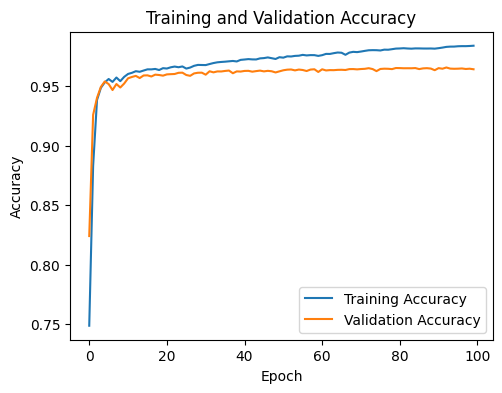

In [41]:
# Extract training history from results
history = results.history

# Plot training and validation accuracy values
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history['accuracy'], label='Training Accuracy')
plt.plot(history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

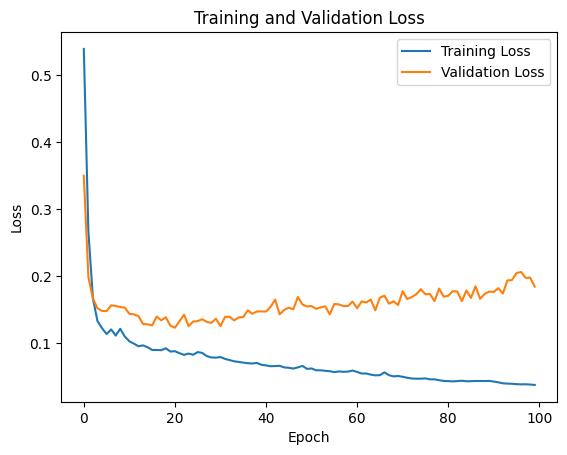

In [42]:
# Plot training and validation loss values
plt.plot(history['loss'], label='Training Loss')
plt.plot(history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.show()

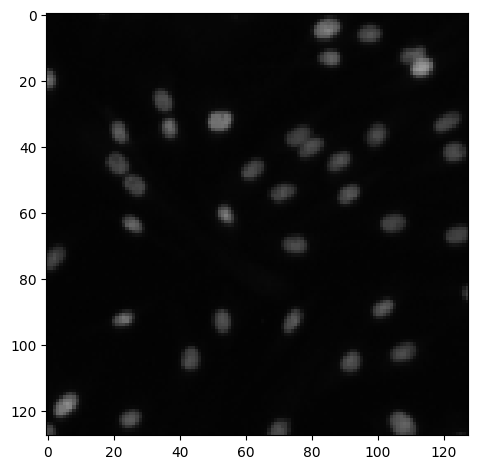

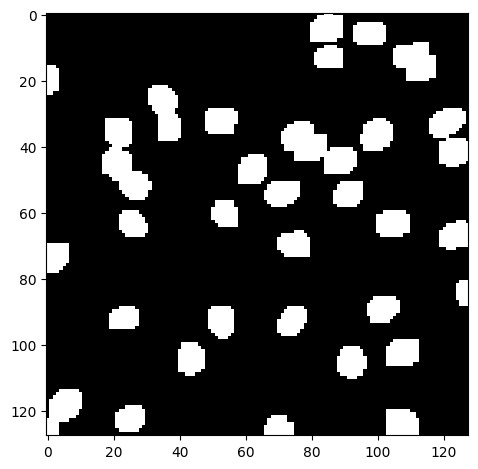

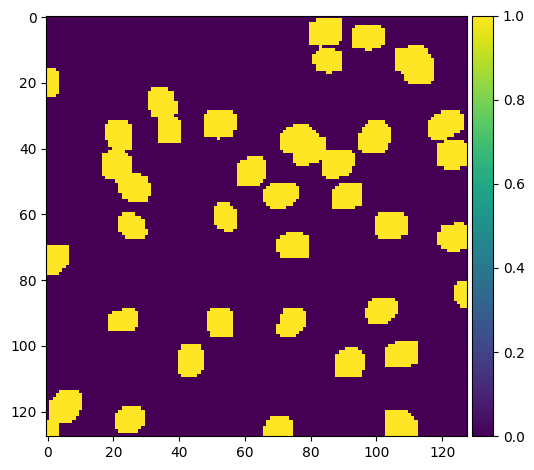

IndexError: index 67 is out of bounds for axis 0 with size 67

In [44]:
# Perform a sanity check on some random training samples
ix = random.randint(0, len(preds_train_t))
imshow(X_train[ix])
plt.show()
imshow(np.squeeze(Y_train[ix]))
plt.show()
imshow(np.squeeze(preds_train_t[ix]))
plt.show()

# Perform a sanity check on some random validation samples
ix = random.randint(0, len(preds_val_t))
imshow(X_train[int(X_train.shape[0]*0.9):][ix])
plt.show()
imshow(np.squeeze(Y_train[int(Y_train.shape[0]*0.9):][ix]))
plt.show()
imshow(np.squeeze(preds_val_t[ix]))
plt.show()




In [ ]:
pip freeze > requirements.txt